In [ ]:
# Basics imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px

# Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# For shows results
from sklearn.metrics import accuracy_score

# For select features
from sklearn.feature_selection import SelectKBest, chi2

# For hyper parameters
from sklearn.model_selection import RandomizedSearchCV

# For validation
from sklearn.model_selection import KFold,cross_validate,cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import requests 
from io import StringIO
# Control the seed
seed = np.random.seed(4999)

In [ ]:
from google.colab import drive

drive.mount('/content/GDrive/')

print("Drive mounted  successfully")

Mounted at /content/GDrive/
Drive mounted  successfully


In [ ]:
url = 'https://drive.google.com/file/d/1NLGVqtZOrxx0PTacTExtTMVUC4i5rVgA/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df = pd.read_csv(csv_raw)
print(df.head())

   Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]


In [ ]:
df.shape

(918, 12)

In [ ]:
def describe(df):                        
                                        
  columns=df.columns.to_list()  
  ncol=df.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')

In [ ]:
#describe(df)

In [ ]:
NaN = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in NaN:
    print(i, ":", df[i].unique())

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


In [ ]:
encoder = LabelEncoder()
for i in NaN:
    df[i] = encoder.fit_transform(df[i])
#df.head()

In [ ]:
def rename(num):
    if num < 0:
        return 0
    return num


df["oldpeak"] = df["Oldpeak"].map(rename)
df.drop('Oldpeak', axis=1, inplace = True)

In [ ]:
# Separing variables from values
x = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

#x.head()

In [ ]:
#print(x['Cholesterol'].value_counts())

print('')
print('')
mean = x['Cholesterol'].mean()
print("The mean of cholesterol is:",mean)


# replace 0 with mean value
x['Cholesterol'].replace({0:mean}, inplace=True)



The mean of cholesterol is: 198.7995642701525


In [ ]:
#x.describe()

Pre-processing

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size =0.2,shuffle = True, stratify = y)

In [ ]:
model = MultinomialNB().fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
accuracy_mnb_model = accuracy_score(y_test, predict)

print("The accuracy of this model are: ",round(accuracy_mnb_model, 3))

The accuracy of this model are:  0.842


In [ ]:
model = GaussianNB().fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
accuracy_gnb_model = accuracy_score(y_test, predict)

print("The accuracy of this model are: ",round(accuracy_gnb_model, 3))

The accuracy of this model are:  0.87


In [ ]:
model = XGBClassifier().fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
accuracy_xgb_model = accuracy_score(y_test, predict)

print("The accuracy of this model are: ",round(accuracy_xgb_model, 3))

The accuracy of this model are:  0.88


In [ ]:
model = AdaBoostClassifier().fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
accuracy_adb_model = accuracy_score(y_test, predict)

print("The accuracy of this model are: ",round(accuracy_adb_model, 3))

The accuracy of this model are:  0.87


In [ ]:
model = GradientBoostingClassifier().fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
accuracy_gdb_model = accuracy_score(y_test, predict)

print("The accuracy of this model are: ",round(accuracy_gdb_model, 3))

The accuracy of this model are:  0.864


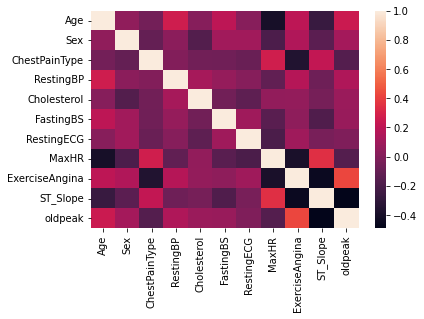

In [ ]:
sns.heatmap(x_train.corr())
plt.show()

In [ ]:
cv = KFold(n_splits =10, shuffle=True)

cv_results = cross_validate(model,x_train, y_train, cv=cv, return_train_score=False)

cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

print('')
print('Accuracy mean:',round(cv_mean,2))
print('')
print('Accuracy interval:',round(cv_mean-2*cv_std,2),round(cv_mean+2*cv_std,2))
print('')


Accuracy mean: 0.86

Accuracy interval: 0.8 0.93



In [ ]:
#print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        82
           1       0.89      0.86      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



[[71 11]
 [14 88]]


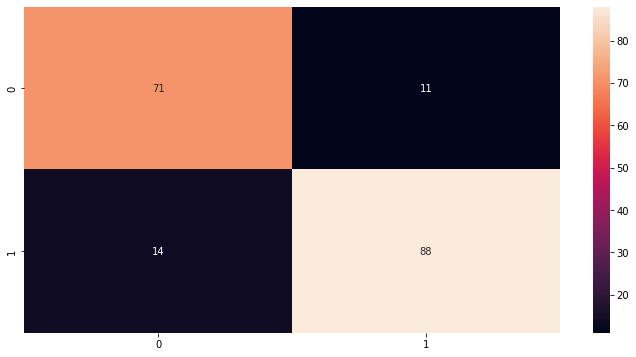

In [ ]:
plt.rc('figure', figsize=(12,6))
print(confusion_matrix(y_test,predict))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)